## Youtube Networks

### Description about the dataset

#### Youtube is one of the biggest American video sharig online platform which is used across the globe by billions of users. The youtube dataset contains the links between users-to-users. The app has more than 3.2 million users and 9.4 million connections or friendship connections 

#### The social network dataset I am using shows the connection amongst the users of the app, it can be a relation between either the creator and viewer, viewer and viewer, or creator and creator. The dataset consists of unilateral and undirected network. In the dataset node is represented by the individual users and the edges are represented by the relationships or the links between the users.

### Analysis by Pritika Timsina (GH1017979)

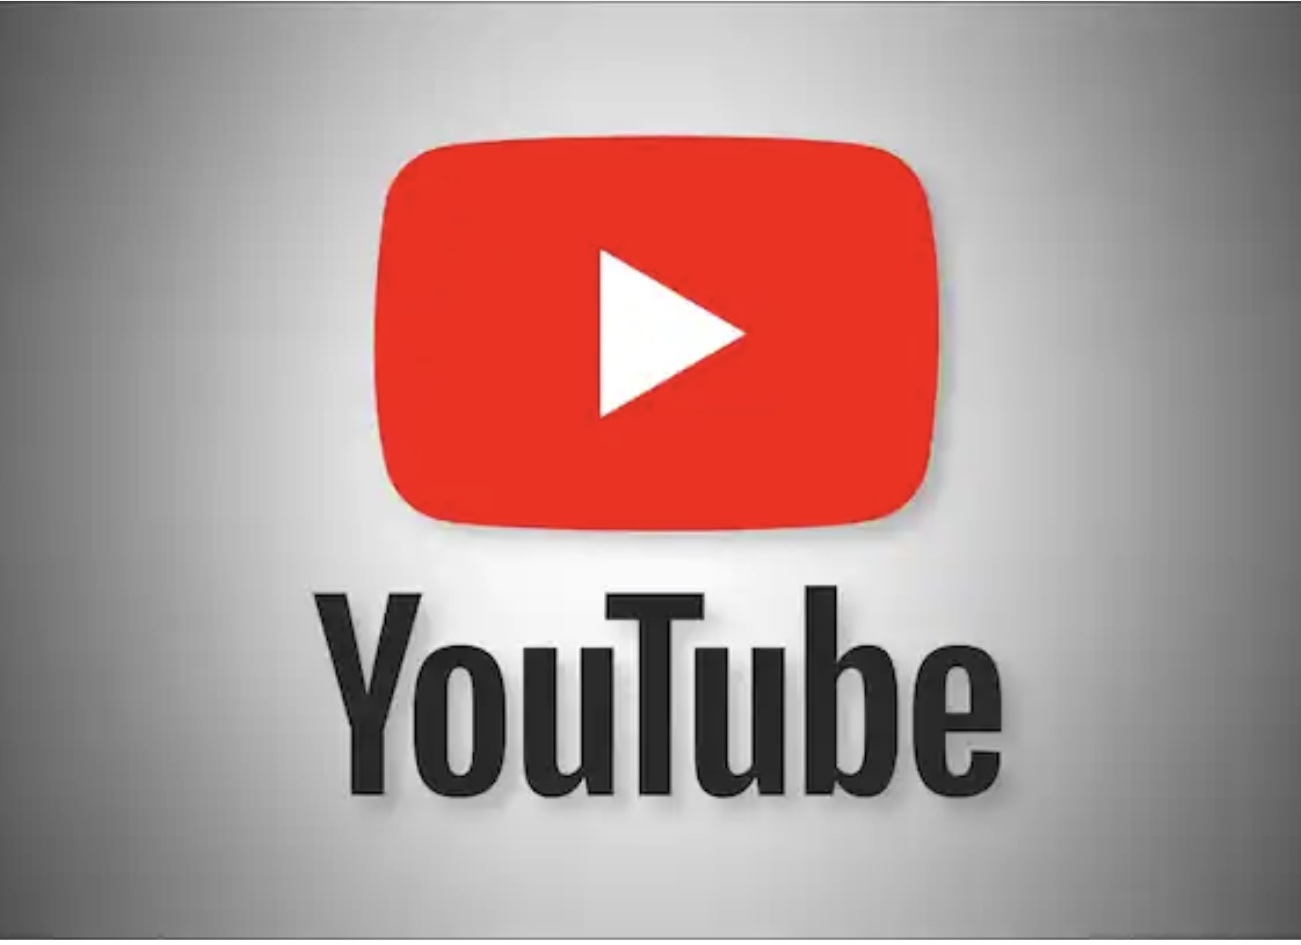

In [20]:
image_path = "youtube.jpg" 
display(Image(filename=image_path))

## Dataset Extraction, Source and Summary

### Network Repository

#### For my report I have used Network Repository to collect data. Network Reposity has collection of various dataset varing from different domains. These domains include web graph, social network, communication, and many more. 

#### For my report I have used the dataset of Youtube which falls under the social network, relation and communication domain. 

## Importing Libraries

In [1]:
# For the images
from IPython.display import Image
from IPython.display import display

# For import dataset
import numpy as np
import pandas as pd

# For importing Networks
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import itertools
from networkx.algorithms import centrality, link_analysis
from networkx.algorithms import approximation

## Network Selection

#### I chose a real world, synthesized network data-set. Later I will compare the synthesize the networks with my Real-Network. My Real Network 

### Research Questions

#### 1. How is information transmitted?

#### 2. How does the network adapt to targeted attacks? 

#### 3. How does the network maintain connectivity? How is the network influenced by its users? 

#### 4. How is the network dynamics affected by users?


## Gathering Dataset

#### Loading the data-set and checking the missing values and duplicate values, Trimming the dataset to make it shorter cause I have more than 2 million rows.

In [2]:
data = pd.read_csv('youtube.csv')
print(data.duplicated().sum())
print(data.isnull().sum())
print (data)

# trimming the datset
data_trimmed = data[:10000]
data_trimmed.to_csv('youtube_data.csv', index=False)
print('Data has been trimmed and saved to "youtube_data.csv".')

#Reloading the data
data = pd.read_csv('youtube_data.csv')
print (data) 

0
users    0
links    0
dtype: int64
           users    links
0              3        1
1              4        1
2              5        1
3              6        1
4              7        1
...          ...      ...
2987618  1134776  1134775
2987619  1134819  1134791
2987620  1134823  1134822
2987621  1134868  1134866
2987622  1134869  1134867

[2987623 rows x 2 columns]
Data has been trimmed and saved to "youtube_data.csv".
       users  links
0          3      1
1          4      1
2          5      1
3          6      1
4          7      1
...      ...    ...
9995  645470     45
9996  645471     45
9997  645472     45
9998  645473     45
9999  645474     45

[10000 rows x 2 columns]


### Real Network 

In [3]:
#Creating an empty graph object
Graph = nx.Graph()

# Adding nodes and edges. Cause mine had zero in the beginning
nodes = data['users'].tolist()
Graph.add_nodes_from(nodes)

edges = [(row['users'], row['links']) for _, row in data.iterrows()]
Graph.add_edges_from(edges)

#Printing the number of nodes and edges
print("Number of nodes:", Graph.number_of_nodes())
print("Number of edges:", Graph.number_of_edges())

Number of nodes: 8942
Number of edges: 10000


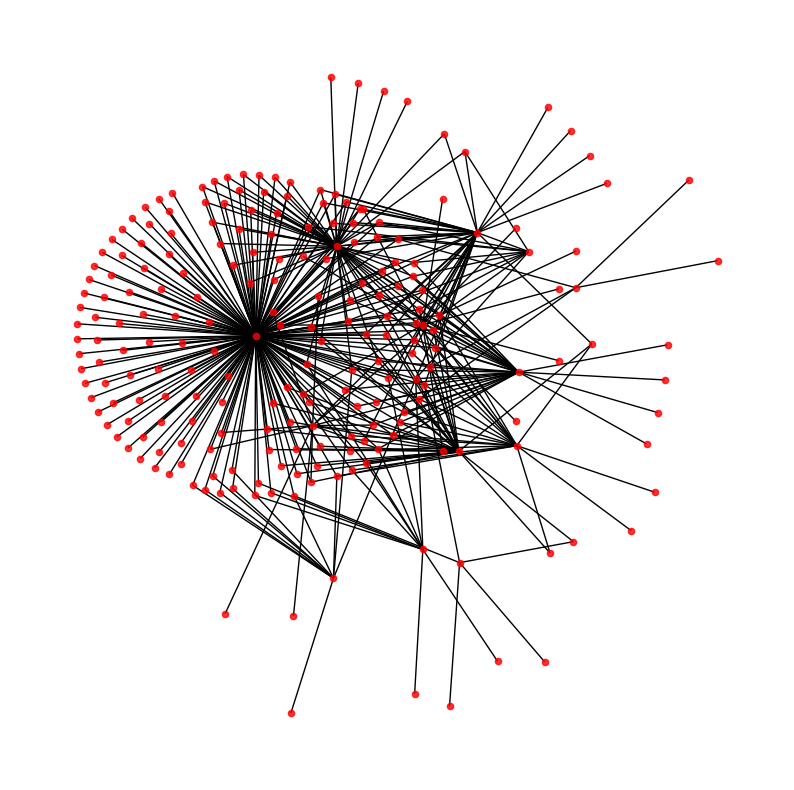

In [4]:
# Plotting the graph 

def plot_nx_graph(Graph, max_nodes=None):
    plt.figure(figsize=(10, 10))

    if max_nodes:
        nodes = list(Graph.nodes())[:max_nodes]
        edges = Graph.subgraph(nodes).edges()
        subgraph = nx.Graph(edges)
    else:
        subgraph = Graph

    pos = nx.kamada_kawai_layout(subgraph)

    try:
        nx.draw_networkx_nodes(subgraph, pos, node_color='red', node_size=20, alpha=0.8)
    except nx.NetworkXError as e:
        print(f"Error: {e}") 
        
# Since my code had some errors I had to make a loop and expect an error in advance due to the size of the network
  
    nx.draw_networkx_edges(subgraph, pos, edge_color='black', alpha=1)
    plt.axis('off')
    plt.show()

plot_nx_graph(Graph, max_nodes=400) 

#### The representation of connections between the nodes of the existing network is known as a real network. Whereas, synthetic data is an artificially created network that follows similar characteristics to real data. Real networks mostly reflect complicated patterns and structures. Synthetic data is mostly considered useful when there is incomplete real data or when real data is unavailable.

## Synthetic Network Generation

#### I will create three synthetic networks, Random Graph, Barabasi Model and Watt Strogatz Model with the same amount of nodes and edges as per the Real Network

### Random Graph

#### A random connection is a connection between nodes that are determined through a mathematical model. To have a simple view of networks in the real world, the random graph is made available with different algorithms which have their own attribute.

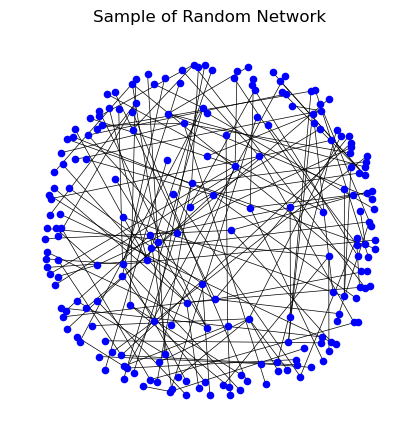

In [5]:
# Making sure that the number of nodes and edges are similar to the real network
num_nodes = 8942
num_edges = 10000

# Creating a random graph that matches to the real network
random_network = nx.gnm_random_graph(num_nodes, num_edges)

# Taking a smaple number of nodes and edges from the random network to make a subgraph
sample_nodes = list(random_network.nodes())[:100]
sample_edges = list(random_network.edges())[:150]

subgraphs = random_network.edge_subgraph(sample_edges)

# Visualizing the subgraph 
plt.figure(figsize=(4, 4))
pos = nx.spring_layout(subgraphs, k=0.9) 

nx.draw_networkx(subgraphs, pos, node_size=20, node_color='blue', edge_color='black',
                 width=0.5, alpha=1, with_labels=False)

plt.title("Sample of Random Network")
plt.axis('off') 
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

plt.show()

### Barabasi-Albert (BA) Model

#### The Barabási-Albert model is a type of random graph model that generates a network considering a scale-free distribution. In this model, new nodes are added to the network which is already well-connected to existing nodes.

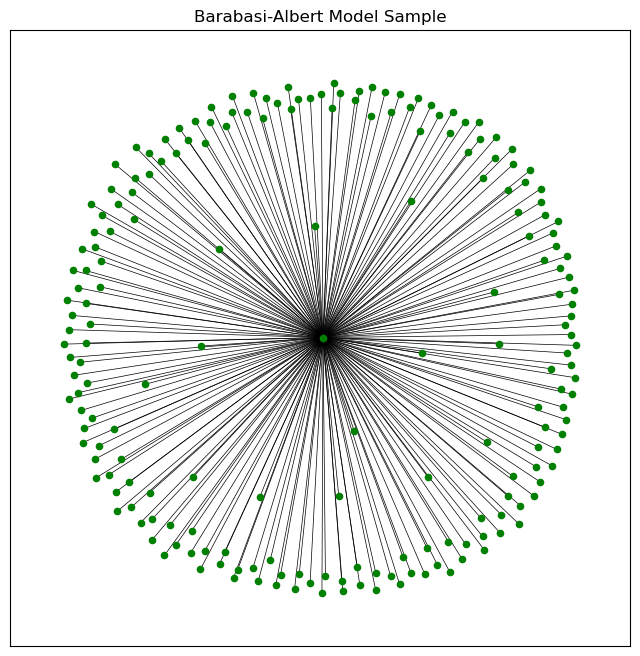

In [6]:
#Had to change the number of edges cause in Barabasi Model m >= 1 and m < n, and my m was 10000, so changed to 8941.
num_nodes = 8942
num_edges = 8941

# Generate Barabasi-Albert preferential attachment model
barabasi_model = nx.barabasi_albert_graph(num_nodes, num_edges)

# Creating a sub graph 
sample_nodes = list(barabasi_model.nodes())[:200]

subgraph = barabasi_model.subgraph(sample_nodes)

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(subgraph, k=0.9)

nx.draw_networkx(subgraph, pos, node_size=20, node_color='green', edge_color='black',
                 width=0.5, alpha=1, with_labels=False)

plt.title("Barabasi-Albert Model Sample")
plt.show()

### Watts-Strogatz Model

#### The Watts-Strogatz model which was proposed by Duncan J. Watts and Steven H. Strogatz is a random graph model that generates networks within a small world. in this model, each node is connected to the nodes which are closest to the specific node. This model helps to capture small-world events which are observed in real networks.

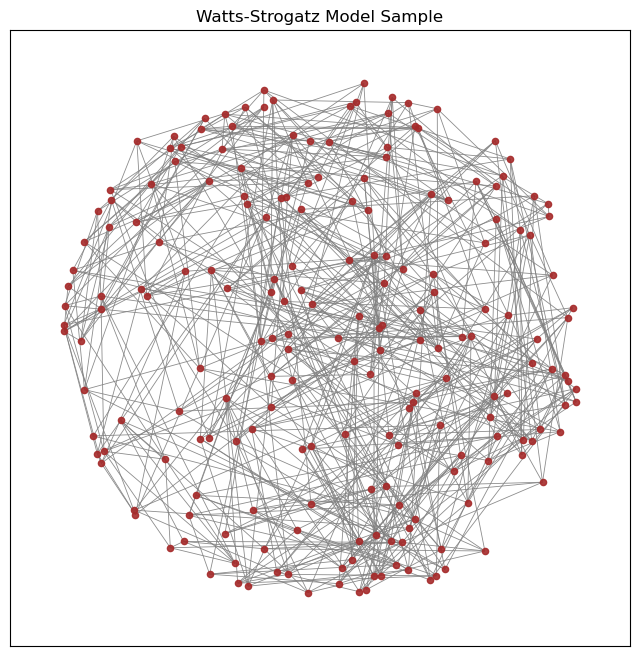

In [7]:
# The same number of nodes as my Real Network 
num_nodes = 8942
num_edges = 10000

ws_model = nx.watts_strogatz_graph(num_nodes, 6, 0.05)

# Creating the sample or a subgraph
sample_nodes = list(ws_model.nodes())[:200]

subgraph = ws_model.subgraph(sample_nodes)

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(subgraph, k=0.9)  # Adjust the layout for better spacing

nx.draw_networkx(subgraph, pos, node_size=20, node_color='brown', edge_color='gray',
                 width=0.6, alpha=0.9, with_labels=False)

plt.title("Watts-Strogatz Model Sample")
plt.show()

### Erdős-Rényi Model

#### Also known as the "G(n, p)" model, the Erdős-Rényi model, proposed by Paul Erdős and Alfréd Rényi, is a random graph model in which nodes are generated with all possible edges between the nodes. This model has the ability to produce either connected or disconnected networks which is denoted by the value of "p".

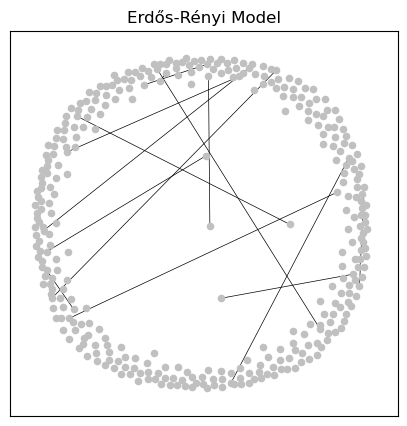

In [41]:
# Having the same numebr of nodes as per my real network
num_nodes = 8942
num_edges = 10000

er_model = nx.gnm_random_graph(num_nodes, num_edges)

sample_nodes = list(er_model.nodes())[:350]
subgraph = er_model.subgraph(sample_nodes)

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(subgraph, k=0.9)  # Adjust the layout for better spacing

nx.draw_networkx(subgraph, pos, node_size=20, node_color='silver', edge_color='black',
                 width=0.5, alpha=1, with_labels=False)

plt.title("Erdős-Rényi Model")
plt.show()


### Network Analysis

#### The analysis or study of complex networks and graphs is known as network analysis. This analysis involves the study of nodes and edges, their connection, and interactions. Analysis helps us to better understand the structure and behavior of a network. Network analysis can be done to make predictions, make decisions, and optimize systems. This can be done by measuring networks, identifying centralities, and processing networks.

#### These are the metrics I used for my Network and Centrality Analysis.

##### 1. Number of Nodes: Number of nodes that are present in a network.  In a real network, there are 8942 nodes present. 
##### 2. Number of Edges: Number of connections between nodes of a network.  There are 10000 edges in a real network. 
##### 3. Density: Measure the connectivity of a network by calculating the ratio of actual edges to a possible number of edges in a network. 
##### 4. Max Degree: Maximum number of edges connected to any one node in the network.  Node with the Max degree has 2753 edges.
##### 5. Min Degree: Minimum number of edges connected to any one node in the network.  Node with the Min degree has 1 edge.
##### 6. Average Degree: Average number of edges connected to every node in the network. The average degree is approximately 2.236636.
##### 7. Assortative: Helps to find out the capabilities of nodes to relate to other nodes which have similar or even different degrees. 
##### 8. Number of Triangles: Interconnected groups of three nodes that form a triangular shape. This metric counts the total triangles in a network. 
##### 9. Average Number of Triangles:  Average number of triangles in which each node is involved in a network. 
##### 10. Maximum Number of Triangles: The highest number of triangles any node is connected into. The maximum possible number of triangles in a node is 53.
##### 11. Average Clustering Coefficient: Networks tend to cluster together; this metric calculated the cluster amount of a network. 
##### 12. Transitivity: Helps us study the probability of two nodes connected to a common node are connected to each other. 
##### 13. Maximum k-core:  Represents a Subgraph where each node has at least k connections.  The highest possible k-core is 6.
##### 14. Lower Bound of Maximum Clique: A subset of nodes where each node is directly connected to every other node.
##### 15. Degree Distribution: This shows the frequency of nodes along with different degrees in the network. This helps us to understand how nodes relate with respect to several edges.
##### 16.Connected Component Analysis: These are a Group of nodes where each node is reachable from any other node.

### For Real Network

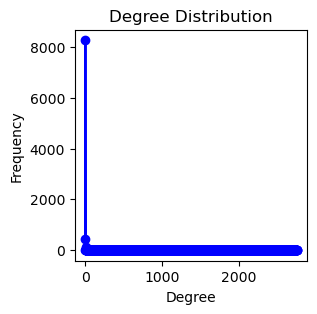

Max Degree: 2753
Min Degree: 1
Average Degree: 2.2366360993066428


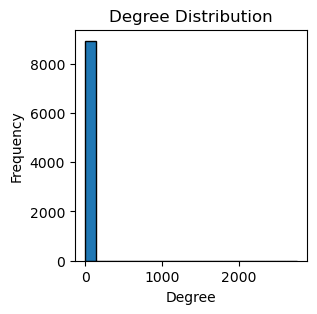

Density: 0.00025015502732430857


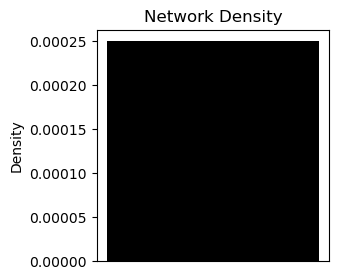

Assortativity: -0.4698781472264327


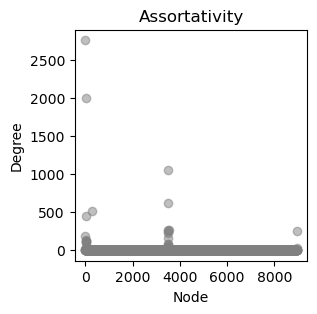

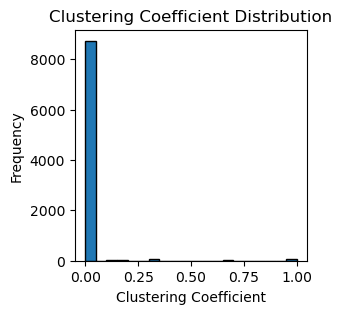

Number of Connected Components: 1
Size of Largest Connected Component: 8942


In [9]:
# Degree Distribution 
degree_distribution = nx.degree_histogram(Graph)

plt.figure(figsize=(3, 3))
plt.plot(degree_distribution, 'bo-')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

# Minimum, Maximum, and Average Degree
max_degree = max(dict(Graph.degree()).values())
min_degree = min(dict(Graph.degree()).values())
avg_degree = sum(dict(Graph.degree()).values()) / Graph.number_of_nodes()
print("Max Degree:", max_degree)
print("Min Degree:", min_degree)
print("Average Degree:", avg_degree)

degrees = [degree for node, degree in Graph.degree()]

plt.figure(figsize=(3, 3))
plt.hist(degrees, bins=20, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

# Density
density = nx.density(Graph)
print('Density:', density)

plt.figure(figsize=(3, 3))
plt.bar(1, density, color='black')
plt.xticks([])
plt.ylabel('Density')
plt.title('Network Density')
plt.show()

# Assortativity
assortativity = nx.degree_assortativity_coefficient(Graph)
print('Assortativity:', assortativity)

plt.figure(figsize=(3, 3))
plt.scatter(range(Graph.number_of_nodes()), [Graph.degree(node) for node in Graph.nodes()],
            color='grey', alpha=0.5)
plt.xlabel('Node')
plt.ylabel('Degree')
plt.title('Assortativity')
plt.show()

# Clustering Coefficient
clustering_coefficient = nx.clustering(Graph)

plt.figure(figsize=(3, 3))
plt.hist(clustering_coefficient.values(), bins=20, edgecolor='black')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution')
plt.show()

# Connected Component Analysis
connected_components = nx.connected_components(Graph)
num_connected_components = nx.number_connected_components(Graph)
largest_component = max(connected_components, key=len)
print("Number of Connected Components:", num_connected_components)
print("Size of Largest Connected Component:", len(largest_component))

In [10]:
# Maximum k-core

k_core = nx.k_core(Graph)
max_k_core = max(k_core.degree(), key=lambda x: x[1])[1]
print("Maximum k-core:", max_k_core)

# Lower Bound of Maximum Clique

lower_bound_clique = nx.graph_clique_number(Graph)
print("Lower Bound of Maximum Clique:", lower_bound_clique)

Maximum k-core: 21
Lower Bound of Maximum Clique: 4


### For Random Graph

In [11]:
# Edges and Nodes
num_nodes = random_network.number_of_nodes()
num_edges = random_network.number_of_edges()

print("Number of Nodes:", num_nodes)
print("Number of Edges:", num_edges)

Number of Nodes: 8942
Number of Edges: 10000


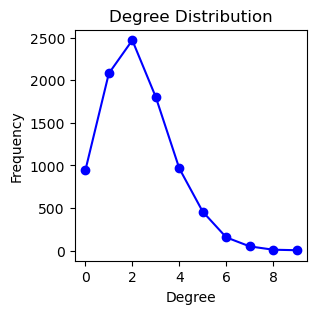

Max Degree: 9
Min Degree: 0
Average Degree: 2.2366360993066428


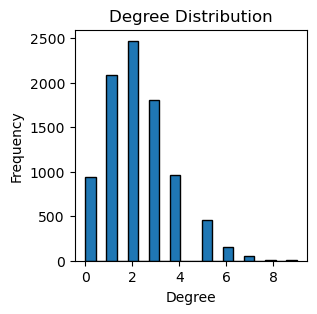

Density: 0.00025015502732430857


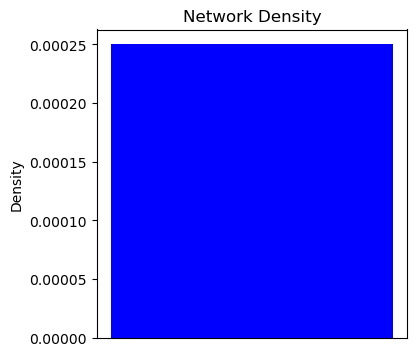

Assortativity: 0.0034186277146719536


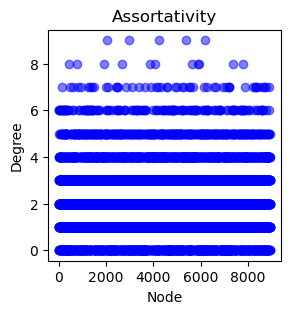

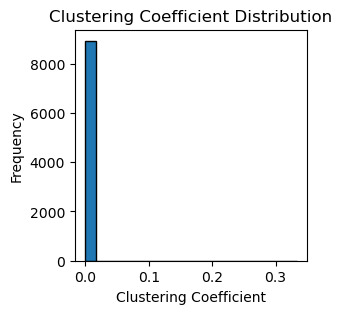

Number of Connected Components: 1102
Size of Largest Connected Component: 7598


In [12]:
# Degree Distribution Analysis

degree_distribution = nx.degree_histogram(random_network)

plt.figure(figsize=(3, 3))
plt.plot(degree_distribution, 'bo-')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

# Minimum, Maximum and Average Degree

max_degree = max(dict(random_network.degree()).values())
min_degree = min(dict(random_network.degree()).values())
avg_degree = sum(dict(random_network.degree()).values()) / num_nodes
print("Max Degree:", max_degree)
print("Min Degree:", min_degree)
print("Average Degree:", avg_degree)

degrees = [degree for node, degree in random_network.degree()]

plt.figure(figsize=(3, 3))
plt.hist(degrees, bins=20, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

# Density

density = nx.density(random_network)
print('Density:', density)

plt.figure(figsize=(4, 4))
plt.bar(1, density, color='blue')
plt.xticks([])
plt.ylabel('Density')
plt.title('Network Density')
plt.show()

# Assortativity

assortativity = nx.degree_assortativity_coefficient(random_network)
print('Assortativity:', assortativity)

plt.figure(figsize=(3, 3))
plt.scatter(range(num_nodes), [random_network.degree(node) for node in random_network.nodes()], 
            color='blue', alpha=0.5)
plt.xlabel('Node')
plt.ylabel('Degree')
plt.title('Assortativity')
plt.show()

# Clustering Coefficient

clustering_coefficient = nx.clustering(random_network)

plt.figure(figsize=(3, 3))
plt.hist(clustering_coefficient.values(), bins=20, edgecolor='black')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution')
plt.show()

# Connected Component Analysis

connected_components = nx.connected_components(random_network)
num_connected_components = nx.number_connected_components(random_network)
largest_component = max(connected_components, key=len)
print("Number of Connected Components:", num_connected_components)
print("Size of Largest Connected Component:", len(largest_component))

In [13]:
# Maximum k-core

k_core = nx.k_core(random_network)
max_k_core = max(k_core.degree(), key=lambda x: x[1])[1]
print("Maximum k-core:", max_k_core)

#Lower Bound

lower_bound_clique = nx.graph_clique_number(random_network)
print("Lower Bound of Maximum Clique:", lower_bound_clique)

Maximum k-core: 9
Lower Bound of Maximum Clique: 3


### BA Model Network Analysis

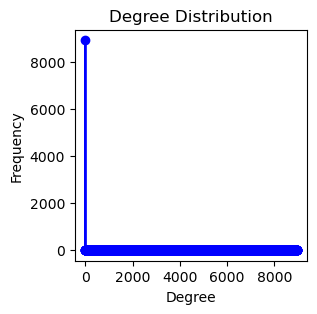

Max Degree: 8941
Min Degree: 1
Average Degree: 1.9997763363900694


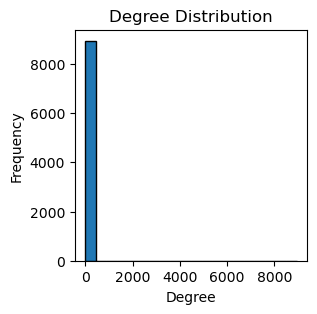

Density: 0.00022366360993066427


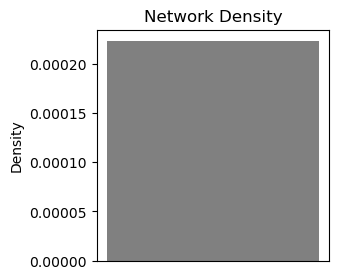

Assortativity: -1.0


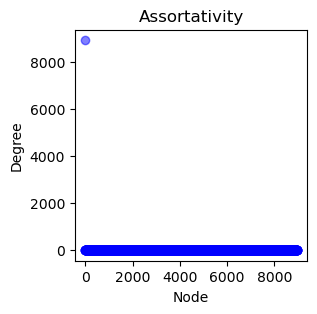

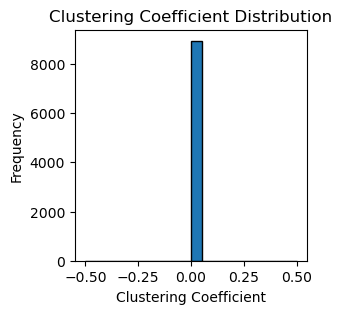

Number of Connected Components: 1
Size of Largest Connected Component: 8942


In [14]:
num_nodes = 8942
num_edges = 8941
random_network = nx.barabasi_albert_graph(num_nodes, num_edges)

# Degree Distribution Analysis
degree_distribution = nx.degree_histogram(random_network)

plt.figure(figsize=(3, 3))
plt.plot(degree_distribution, 'bo-')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

# Minimum, Maximum, and Average Degree
max_degree = max(dict(random_network.degree()).values())
min_degree = min(dict(random_network.degree()).values())
avg_degree = sum(dict(random_network.degree()).values()) / num_nodes
print("Max Degree:", max_degree)
print("Min Degree:", min_degree)
print("Average Degree:", avg_degree)

degrees = [degree for node, degree in random_network.degree()]

plt.figure(figsize=(3, 3))
plt.hist(degrees, bins=20, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

# Density
density = nx.density(random_network)
print('Density:', density)

plt.figure(figsize=(3, 3))
plt.bar(1, density, color='gray')
plt.xticks([])
plt.ylabel('Density')
plt.title('Network Density')
plt.show()

# Assortativity
assortativity = nx.degree_assortativity_coefficient(random_network)
print('Assortativity:', assortativity)

plt.figure(figsize=(3, 3))
plt.scatter(range(num_nodes), [random_network.degree(node) for node in random_network.nodes()], 
            color='blue', alpha=0.5)
plt.xlabel('Node')
plt.ylabel('Degree')
plt.title('Assortativity')
plt.show()

# Clustering Coefficient
clustering_coefficient = nx.clustering(random_network)

plt.figure(figsize=(3, 3))
plt.hist(clustering_coefficient.values(), bins=20, edgecolor='black')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution')
plt.show()

# Connected Component Analysis
connected_components = nx.connected_components(random_network)
num_connected_components = nx.number_connected_components(random_network)
largest_component = max(connected_components, key=len)
print("Number of Connected Components:", num_connected_components)
print("Size of Largest Connected Component:", len(largest_component))


### WS Model Network Analysis

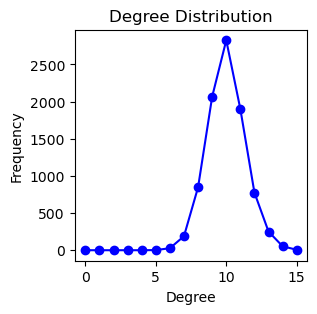

Max Degree: 15
Min Degree: 5
Average Degree: 10.0


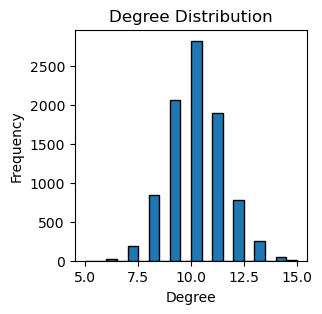

Density: 0.00022366360993066427


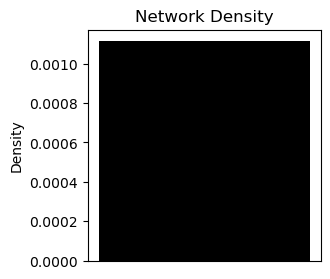

Assortativity: -0.020344626144929087


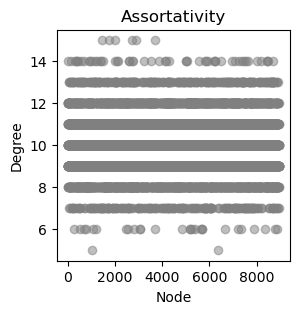

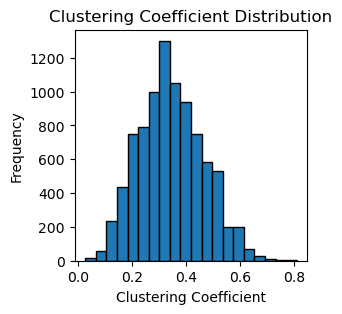

Number of Connected Components: 1
Size of Largest Connected Component: 8942


In [15]:
num_nodes = 8942
k = 10  
p = 0.2
random_network = nx.watts_strogatz_graph(num_nodes, k, p)

# Degree Distribution Analysis
degree_distribution = nx.degree_histogram(random_network)

plt.figure(figsize=(3, 3))
plt.plot(degree_distribution, 'bo-')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

# Minimum, Maximum, and Average Degree
max_degree = max(dict(random_network.degree()).values())
min_degree = min(dict(random_network.degree()).values())
avg_degree = sum(dict(random_network.degree()).values()) / num_nodes
print("Max Degree:", max_degree)
print("Min Degree:", min_degree)
print("Average Degree:", avg_degree)

degree = [degree for node, degree in random_network.degree()]

plt.figure(figsize=(3, 3))
plt.hist(degree, bins=20, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

# Density
densitys = nx.density(random_network)
print('Density:', density)

plt.figure(figsize=(3, 3))
plt.bar(1, densitys, color='black')
plt.xticks([])
plt.ylabel('Density')
plt.title('Network Density')
plt.show()

# Assortativity
assortativity = nx.degree_assortativity_coefficient(random_network)
print('Assortativity:', assortativity)

plt.figure(figsize=(3, 3))
plt.scatter(range(num_nodes), [random_network.degree(node) for node in random_network.nodes()], 
            color='grey', alpha=0.5)
plt.xlabel('Node')
plt.ylabel('Degree')
plt.title('Assortativity')
plt.show()

# Clustering Coefficient
clustering_coefficient = nx.clustering(random_network)

plt.figure(figsize=(3, 3))
plt.hist(clustering_coefficient.values(), bins=20, edgecolor='black')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution')
plt.show()

# Connected Component Analysis
connected_components = nx.connected_components(random_network)
num_connected_components = nx.number_connected_components(random_network)
largest_component = max(connected_components, key=len)
print("Number of Connected Components:", num_connected_components)
print("Size of Largest Connected Component:", len(largest_component))

### Erdős-Rényi Model Network Analysis

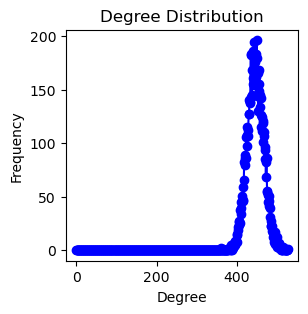

Max Degree: 528
Min Degree: 360
Average Degree: 446.7850592708566


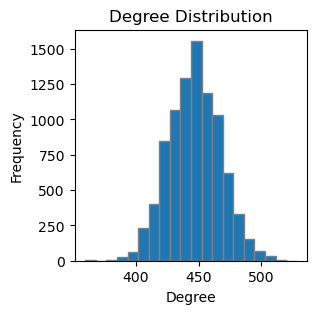

Density: 0.0499703678862383


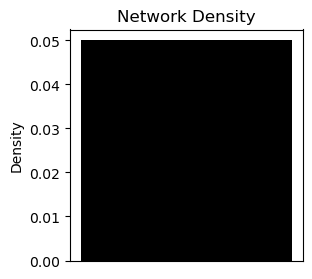

Assortativity: -0.0005669920082255281


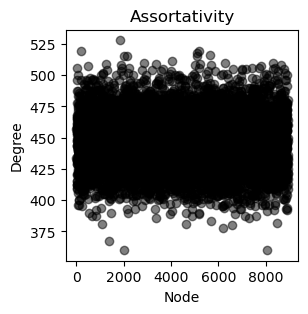

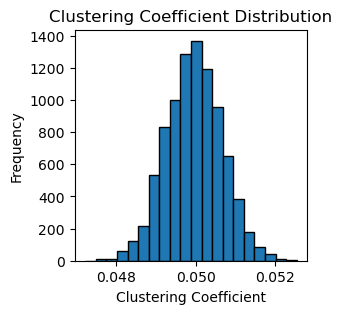

Number of Connected Components: 1
Size of Largest Connected Component: 8942


In [16]:
num_nodes = 8942
edge_probability = 0.05
random_network = nx.erdos_renyi_graph(num_nodes, edge_probability)

# Degree Distribution Analysis
degree_distribut = nx.degree_histogram(random_network)

plt.figure(figsize=(3, 3))
plt.plot(degree_distribut, 'bo-')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

# Minimum, Maximum, and Average Degree
max_degrees = max(dict(random_network.degree()).values())
min_degrees = min(dict(random_network.degree()).values())
avg_degrees = sum(dict(random_network.degree()).values()) / num_nodes
print("Max Degree:", max_degrees)
print("Min Degree:", min_degrees)
print("Average Degree:", avg_degrees)

degrees = [degree for node, degree in random_network.degree()]

plt.figure(figsize=(3, 3))
plt.hist(degrees, bins=20, edgecolor='gray')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

# Density
density = nx.density(random_network)
print('Density:', density)

plt.figure(figsize=(3, 3))
plt.bar(1, density, color='black')
plt.xticks([])
plt.ylabel('Density')
plt.title('Network Density')
plt.show()

# Assortativity
assortativit = nx.degree_assortativity_coefficient(random_network)
print('Assortativity:', assortativit)

plt.figure(figsize=(3, 3))
plt.scatter(range(num_nodes), [random_network.degree(node) for node in random_network.nodes()], 
            color='black', alpha=0.5)
plt.xlabel('Node')
plt.ylabel('Degree')
plt.title('Assortativity')
plt.show()

# Clustering Coefficient
clustering_coefficient = nx.clustering(random_network)

plt.figure(figsize=(3, 3))
plt.hist(clustering_coefficient.values(), bins=20, edgecolor='black')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution')
plt.show()

# Connected Component Analysis
connected_component = nx.connected_components(random_network)
num_connected_component = nx.number_connected_components(random_network)
largest_component = max(connected_component, key=len)
print("Number of Connected Components:", num_connected_component)
print("Size of Largest Connected Component:", len(largest_component))

### Comparing Properties of Real Network with BA, ER and WS 

In [17]:
# Defining the necessary metrics for my comparison
metrics = {
    'Real Network': {
        'Number of Nodes': Graph.number_of_nodes(),
        'Number of Edges': Graph.number_of_edges(),
        'Density': nx.density(Graph),
        'Max Degree': max(dict(Graph.degree()).values()),
        'Min Degree': min(dict(Graph.degree()).values()),
        'Average Degree': sum(dict(Graph.degree()).values()) / Graph.number_of_nodes(),
        'Assortativity': nx.degree_assortativity_coefficient(Graph),
        'Number of Triangles': sum(nx.triangles(Graph).values()) // 3,
        'Average Number of Triangles': sum(nx.triangles(Graph).values()) / Graph.number_of_nodes(),
        'Maximum Number of Triangles': max(nx.triangles(Graph).values()) // 3,
        'Average Clustering Coefficient': nx.average_clustering(Graph),
        'Transitivity': nx.transitivity(Graph),
        'Maximum k-core': max(nx.core_number(Graph).values()),
        'Lower Bound of Maximum Clique': nx.graph_clique_number(Graph)
    },
    'BA Model': {
        'Number of Nodes': barabasi_model.number_of_nodes(),
        'Number of Edges': barabasi_model.number_of_edges(),
        'Density': nx.density(barabasi_model),
        'Max Degree': max(dict(barabasi_model.degree()).values()),
        'Min Degree': min(dict(barabasi_model.degree()).values()),
        'Average Degree': sum(dict(barabasi_model.degree()).values()) / barabasi_model.number_of_nodes(),
        'Assortativity': nx.degree_assortativity_coefficient(barabasi_model),
        'Number of Triangles': sum(nx.triangles(barabasi_model).values()) // 3,
        'Average Number of Triangles': sum(nx.triangles(barabasi_model).values()) / barabasi_model.number_of_nodes(),
        'Maximum Number of Triangles': max(nx.triangles(barabasi_model).values()) // 3,
        'Average Clustering Coefficient': nx.average_clustering(barabasi_model),
        'Transitivity': nx.transitivity(barabasi_model),
        'Maximum k-core': max(nx.core_number(barabasi_model).values()),
        'Lower Bound of Maximum Clique': nx.graph_clique_number(barabasi_model)
    },
    'ER Model': {
        'Number of Nodes': er_model.number_of_nodes(),
        'Number of Edges': er_model.number_of_edges(),
        'Density': nx.density(er_model),
        'Max Degree': max(dict(er_model.degree()).values()),
        'Min Degree': min(dict(er_model.degree()).values()),
        'Average Degree': sum(dict(er_model.degree()).values()) / er_model.number_of_nodes(),
        'Assortativity': nx.degree_assortativity_coefficient(er_model),
        'Number of Triangles': sum(nx.triangles(er_model).values()) // 3,
        'Average Number of Triangles': sum(nx.triangles(er_model).values()) / er_model.number_of_nodes(),
        'Maximum Number of Triangles': max(nx.triangles(er_model).values()) // 3,
        'Average Clustering Coefficient': nx.average_clustering(er_model),
        'Transitivity': nx.transitivity(er_model),
        'Maximum k-core': max(nx.core_number(er_model).values()),
        'Lower Bound of Maximum Clique': nx.graph_clique_number(er_model)
    },
    'WS Model': {
        'Number of Nodes': ws_model.number_of_nodes(),
        'Number of Edges': ws_model.number_of_edges(),
        'Density': nx.density(ws_model),
        'Max Degree': max(dict(ws_model.degree()).values()),
        'Min Degree': min(dict(ws_model.degree()).values()),
        'Average Degree': sum(dict(ws_model.degree()).values()) / ws_model.number_of_nodes(),
        'Assortativity': nx.degree_assortativity_coefficient(ws_model),
        'Number of Triangles': sum(nx.triangles(ws_model).values()) // 3,
        'Average Number of Triangles': sum(nx.triangles(ws_model).values()) / ws_model.number_of_nodes(),
        'Maximum Number of Triangles': max(nx.triangles(ws_model).values()) // 3,
        'Average Clustering Coefficient': nx.average_clustering(ws_model),
        'Transitivity': nx.transitivity(ws_model),
        'Maximum k-core': max(nx.core_number(ws_model).values()),
        'Lower Bound of Maximum Clique': nx.graph_clique_number(ws_model)}}

info_table = pd.DataFrame.from_dict(metrics)
info_table = info_table.transpose()

print(info_table)

              Number of Nodes  Number of Edges   Density  Max Degree  \
Real Network           8942.0          10000.0  0.000250      2753.0   
BA Model               8942.0           8941.0  0.000224      8941.0   
ER Model               8942.0          10000.0  0.000250        10.0   
WS Model               8942.0          26826.0  0.000671         9.0   

              Min Degree  Average Degree  Assortativity  Number of Triangles  \
Real Network         1.0        2.236636      -0.469878                356.0   
BA Model             1.0        1.999776      -1.000000                  0.0   
ER Model             0.0        2.236636       0.010179                  2.0   
WS Model             3.0        6.000000      -0.011526              22963.0   

              Average Number of Triangles  Maximum Number of Triangles  \
Real Network                     0.119436                         53.0   
BA Model                         0.000000                          0.0   
ER Model        

### Centrality Analysis

#### Centrality analysis helps us estimate and understand the importance of a node on the flow and connectivity of the network. It is also used in the measureing of how central a node is in the graph. Along with this, it can be useful to get insights of various domains such as dynamic power, infrastructure and etc. The purpose of the analysis is to have insights into nodes in the network. The nodes play an important role in the collection of information and connecting users to communicate with each other.  Understanding the purpose of nodes can be very beneficial and the information can be used in various domains such as social networks, communication, infrastructure, and many more.

Top 5 Eigenvector centrality:
Node: 4 Eigenvector centrality: 0.6980825500511882
Node: 22 Eigenvector centrality: 0.09227455575054551
Node: 45 Eigenvector centrality: 0.04037512113417953
Node: 2 Eigenvector centrality: 0.0341122287786633
Node: 34 Eigenvector centrality: 0.02624992453129128


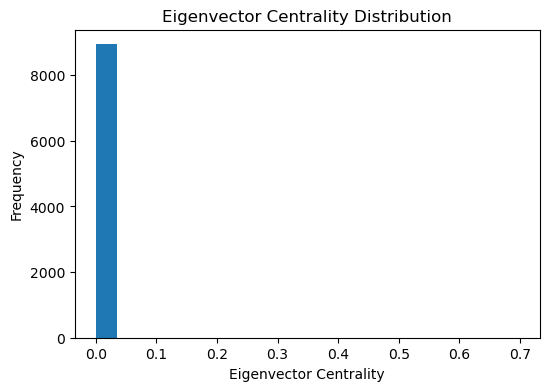

Top 5 PageRank:
Node: 4 PageRank: 0.12808732832673528
Node: 22 PageRank: 0.09558956453350217
Node: 34 PageRank: 0.051320263799629194
Node: 33 PageRank: 0.03102240490291414
Node: 45 PageRank: 0.02216054019805347
Top 5 Closeness Centrality:
Node: 363 Closeness Centrality: 0.46699049409798393
Node: 4 Closeness Centrality: 0.43442981390602986
Node: 455 Closeness Centrality: 0.4282498323594214
Node: 730 Closeness Centrality: 0.4268595435882746
Node: 1 Closeness Centrality: 0.4219244018687178


In [18]:
# Real Network

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(Graph, max_iter=500, tol=1e-6)
top_5_eigen = heapq.nlargest(5, eigenvector_centrality, key=eigenvector_centrality.get)

print("Top 5 Eigenvector centrality:")
for node in top_5_eigen:
    print("Node:", node, "Eigenvector centrality:", eigenvector_centrality[node])

plt.figure(figsize=(6, 4))
plt.hist(list(eigenvector_centrality.values()), bins=20)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality Distribution')
plt.show()

# PageRank
pagerank = nx.pagerank(Graph)
top_nodes = heapq.nlargest(5, pagerank, key=pagerank.get)

print("Top 5 PageRank:")
for node in top_nodes:
    print("Node:", node, "PageRank:", pagerank[node])

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(Graph)
top_5_closeness = heapq.nlargest(5, closeness_centrality, key=closeness_centrality.get)

print("Top 5 Closeness Centrality:")
for node in top_5_closeness:
    print("Node:", node, "Closeness Centrality:", closeness_centrality[node])

#### To have a clear understanding of the properties and behavior of network models, performing centrality analysis in ER (Erdős-Rényi), BA (Barabási-Albert), and WS (Watts-Strogatz) models is important. These models provide insights into the importance and understanding of different nodes in different models.

Top 10 nodes for each centrality metric

Degree Centrality
{0: 1.0, 1: 0.00011184431271669836, 2: 0.00011184431271669836, 3: 0.00011184431271669836, 4: 0.00011184431271669836, 5: 0.00011184431271669836, 6: 0.00011184431271669836, 7: 0.00011184431271669836, 8: 0.00011184431271669836, 9: 0.00011184431271669836}

PageRank
{0: 0.45763876944987253, 1: 6.0660019075056224e-05, 2: 6.0660019075056224e-05, 3: 6.0660019075056224e-05, 4: 6.0660019075056224e-05, 5: 6.0660019075056224e-05, 6: 6.0660019075056224e-05, 7: 6.0660019075056224e-05, 8: 6.0660019075056224e-05, 9: 6.0660019075056224e-05}

Betweenness Centrality
{0: 1.0001118443127168, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}

Closeness Centrality
{0: 1.0, 1: 0.5000279626419104, 2: 0.5000279626419104, 3: 0.5000279626419104, 4: 0.5000279626419104, 5: 0.5000279626419104, 6: 0.5000279626419104, 7: 0.5000279626419104, 8: 0.5000279626419104, 9: 0.5000279626419104}



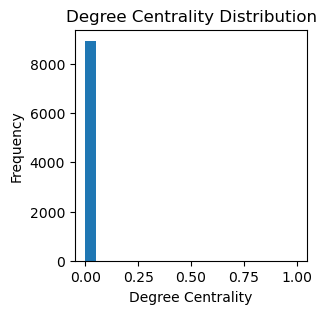

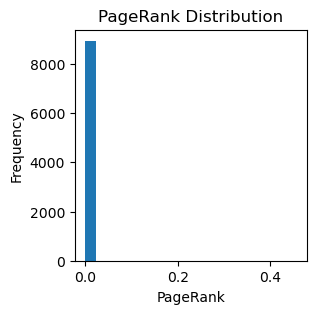

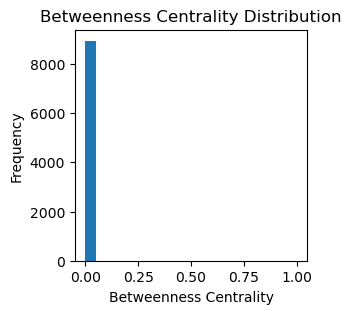

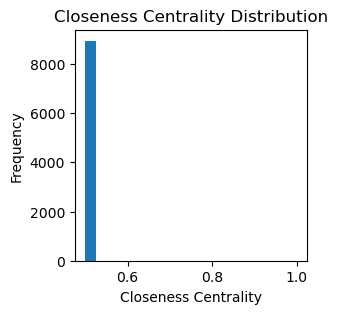

In [21]:
# BA Model

def get_top_n_centrality_nodes(G, n):
    result = {}

    # Degree Centrality
    degree_centrality = nx.degree_centrality(G)
    top_degree_centrality = dict(heapq.nlargest(n, degree_centrality.items(), key=lambda i: i[1]))
    result['Degree Centrality'] = top_degree_centrality

    # PageRank
    pagerank = nx.pagerank(G)
    top_pagerank = dict(heapq.nlargest(n, pagerank.items(), key=lambda i: i[1]))
    result['PageRank'] = top_pagerank

    # Betweenness Centrality (Approximate)
    betweenness_centrality = nx.betweenness_centrality(G, k=100)  # Adjust the value of k as needed
    top_betweenness_centrality = dict(heapq.nlargest(n, betweenness_centrality.items(), key=lambda i: i[1]))
    result['Betweenness Centrality'] = top_betweenness_centrality

    # Closeness Centrality
    closeness_centrality = nx.closeness_centrality(G)
    top_closeness_centrality = dict(heapq.nlargest(n, closeness_centrality.items(), key=lambda i: i[1]))
    result['Closeness Centrality'] = top_closeness_centrality

    return result

num_nodes = 8942
num_edges = 8941
G = nx.barabasi_albert_graph(num_nodes, num_edges)

top_50_centrality_nodes = get_top_n_centrality_nodes(G, 50)

print('Top 10 nodes for each centrality metric\n')
for title, internal_dict in top_50_centrality_nodes.items():
    print(title)
    display_dict = dict(itertools.islice(internal_dict.items(), 10))
    print(display_dict)
    print()

    #Graphs
    
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
plt.figure(figsize=(3, 3))
plt.hist(list(degree_centrality.values()), bins=20)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Distribution')
plt.show()

# PageRank
pagerank = nx.pagerank(G)
plt.figure(figsize=(3, 3))
plt.hist(list(pagerank.values()), bins=20)
plt.xlabel('PageRank')
plt.ylabel('Frequency')
plt.title('PageRank Distribution')
plt.show()

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G, k=100)  # Adjust the value of k as needed
plt.figure(figsize=(3, 3))
plt.hist(list(betweenness_centrality.values()), bins=20)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality Distribution')
plt.show()

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
plt.figure(figsize=(3, 3))
plt.hist(list(closeness_centrality.values()), bins=20)
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality Distribution')
plt.show()


Top 10 nodes for each centrality metric

Degree Centrality
{5084: 0.0005592215635834918, 375: 0.0004473772508667934, 1123: 0.0004473772508667934, 1446: 0.0004473772508667934, 1705: 0.0004473772508667934, 1775: 0.0004473772508667934, 2077: 0.0004473772508667934, 2300: 0.0004473772508667934, 2347: 0.0004473772508667934, 2477: 0.0004473772508667934}

PageRank
{5084: 0.00022471716813225596, 2077: 0.0002077389183643721, 4495: 0.00020271959137862301, 1123: 0.0002020087113344253, 375: 0.00020138153537460643, 4548: 0.00020028084172189496, 1446: 0.00019980431579605742, 2940: 0.00019801289973778893, 1705: 0.0001967877009364765, 4497: 0.00019499971214227536}

Betweenness Centrality
{7: 0.6403915266548518, 2810: 0.571786538999011, 3: 0.48997090171286944, 2825: 0.4898534389123629, 6: 0.489299685709975, 5: 0.4892884987765934, 4: 0.4892773118432118, 2824: 0.4889193299750015, 2823: 0.4889081430416199, 2822: 0.4888969561082383}

Closeness Centrality
{7: 0.00723265574513533, 6: 0.007226849391489855, 5: 

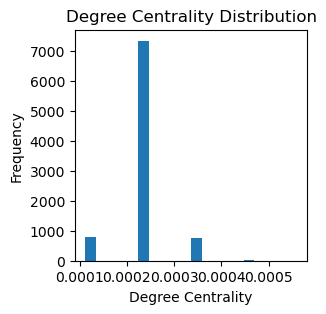

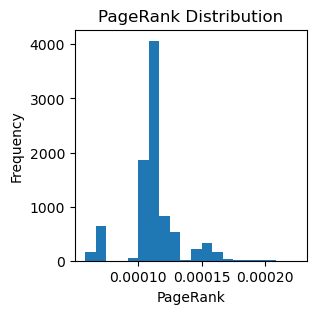

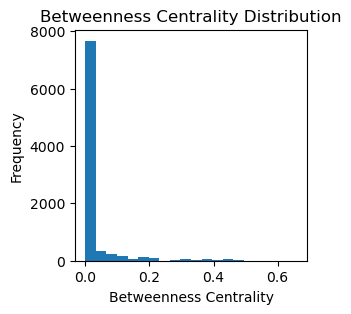

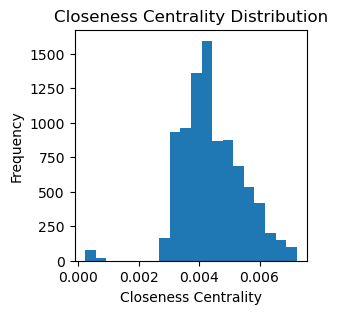

In [25]:
# Watts Strogatz Centrality Analysis

def get_top_n_centrality_nodes(G, n):
    result = {}

    # Degree Centrality
    degree_centrality = nx.degree_centrality(G)
    top_degree_centrality = dict(heapq.nlargest(n, degree_centrality.items(), key=lambda i: i[1]))
    result['Degree Centrality'] = top_degree_centrality

    # PageRank
    pagerank = nx.pagerank(G)
    top_pagerank = dict(heapq.nlargest(n, pagerank.items(), key=lambda i: i[1]))
    result['PageRank'] = top_pagerank

    # Betweenness Centrality (Approximate)
    betweenness_centrality = nx.betweenness_centrality(G, k=100)  # Adjust the value of k as needed
    top_betweenness_centrality = dict(heapq.nlargest(n, betweenness_centrality.items(), key=lambda i: i[1]))
    result['Betweenness Centrality'] = top_betweenness_centrality

    # Closeness Centrality
    closeness_centrality = nx.closeness_centrality(G)
    top_closeness_centrality = dict(heapq.nlargest(n, closeness_centrality.items(), key=lambda i: i[1]))
    result['Closeness Centrality'] = top_closeness_centrality

    return result

num_nodes = 8942
avg_degree = 2
rewiring_prob = 0.1
G = nx.watts_strogatz_graph(num_nodes, avg_degree, rewiring_prob)

top_50_centrality_nodes = get_top_n_centrality_nodes(G, 50)

print('Top 10 nodes for each centrality metric\n')
for title, internal_dict in top_50_centrality_nodes.items():
    print(title)
    display_dict = dict(itertools.islice(internal_dict.items(), 10))
    print(display_dict)
    print()

# Degree Centrality
degree_centrality = nx.degree_centrality(G)
plt.figure(figsize=(3, 3))
plt.hist(list(degree_centrality.values()), bins=20)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Distribution')
plt.show()

# PageRank
pagerank = nx.pagerank(G)
plt.figure(figsize=(3, 3))
plt.hist(list(pagerank.values()), bins=20)
plt.xlabel('PageRank')
plt.ylabel('Frequency')
plt.title('PageRank Distribution')
plt.show()

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G, k=100)  # Adjust the value of k as needed
plt.figure(figsize=(3, 3))
plt.hist(list(betweenness_centrality.values()), bins=20)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality Distribution')
plt.show()

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
plt.figure(figsize=(3, 3))
plt.hist(list(closeness_centrality.values()), bins=20)
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality Distribution')
plt.show()


Top 10 nodes for each centrality metric

Degree Centrality
{2973: 0.0007829101890168885, 3512: 0.0007829101890168885, 8617: 0.0006710658763001902, 752: 0.0005592215635834918, 840: 0.0005592215635834918, 1292: 0.0005592215635834918, 1459: 0.0005592215635834918, 2137: 0.0005592215635834918, 2707: 0.0005592215635834918, 2971: 0.0005592215635834918}

PageRank
{2973: 0.0005808203935016671, 8617: 0.0005254997259737864, 3512: 0.0005196304554714805, 4318: 0.00043053004689598594, 840: 0.00042831612663629193, 1459: 0.0004123500270127204, 3310: 0.0004048810220903048, 5036: 0.00040450496206461295, 1292: 0.0004042400152746914, 1728: 0.0004019994037141309}

Betweenness Centrality
{1458: 0.0009195659239653839, 752: 0.0007439310698746719, 8913: 0.0007126076564062646, 2701: 0.0007092515763917924, 4716: 0.0006443673627786632, 6961: 0.0006130439493102559, 856: 0.0006063317892813115, 8663: 0.0005996196292523671, 7486: 0.0005985009359142097, 2869: 0.0005884326958707931}

Closeness Centrality
{752: 0.002560

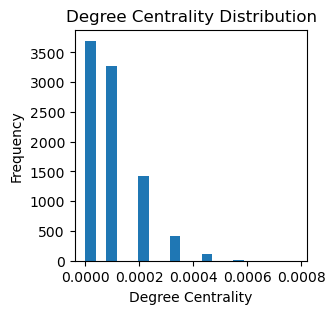

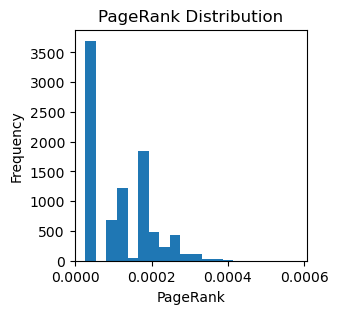

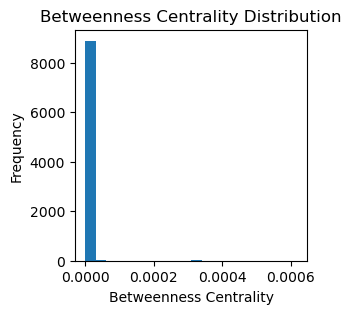

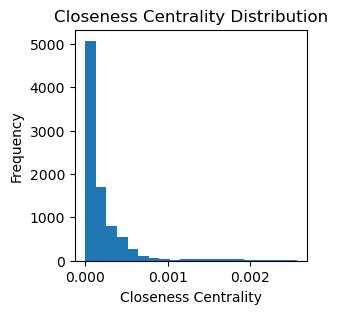

In [31]:
# ER Centrality Model

def get_top_n_centrality_nodes(G, n):
    result = {}

    # Degree Centrality
    degree_centralit = nx.degree_centrality(G)
    degree_centrality = dict(heapq.nlargest(n, degree_centralit.items(), key=lambda i: i[1]))
    result['Degree Centrality'] = degree_centrality

    # PageRank
    pagerank = nx.pagerank(G)
    top_pagerank = dict(heapq.nlargest(n, pagerank.items(), key=lambda i: i[1]))
    result['PageRank'] = top_pagerank

    # Betweenness Centrality (Approximate)
    betweenness_centrality = nx.betweenness_centrality(G, k=100)  # Adjust the value of k as needed
    top_betweenness_centrality = dict(heapq.nlargest(n, betweenness_centrality.items(), key=lambda i: i[1]))
    result['Betweenness Centrality'] = top_betweenness_centrality

    # Closeness Centrality
    closeness_centralit = nx.closeness_centrality(G)
    closeness_centrality = dict(heapq.nlargest(n, closeness_centralit.items(), key=lambda i: i[1]))
    result['Closeness Centrality'] = closeness_centrality

    return result

num_nodes = 8942
edge_probability = 0.0001
G = nx.erdos_renyi_graph(num_nodes, edge_probability)

top_50_centrality_nodes = get_top_n_centrality_nodes(G, 50)

print('Top 10 nodes for each centrality metric\n')
for title, internal_dict in top_50_centrality_nodes.items():
    print(title)
    display_dict = dict(itertools.islice(internal_dict.items(), 10))
    print(display_dict)
    print()

# Degree Centrality
degree_centrality = nx.degree_centrality(G)
plt.figure(figsize=(3, 3))
plt.hist(list(degree_centrality.values()), bins=20)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Distribution')
plt.show()

# PageRank
pagerank = nx.pagerank(G)
plt.figure(figsize=(3, 3))
plt.hist(list(pagerank.values()), bins=20)
plt.xlabel('PageRank')
plt.ylabel('Frequency')
plt.title('PageRank Distribution')
plt.show()

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G, k=100)  # Adjust the value of k as needed
plt.figure(figsize=(3, 3))
plt.hist(list(betweenness_centrality.values()), bins=20)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality Distribution')
plt.show()

# Closeness Centrality
closeness_centralit = nx.closeness_centrality(G)
plt.figure(figsize=(3, 3))
plt.hist(list(closeness_centralit.values()), bins=20)
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality Distribution')
plt.show()

## Failure Analysis

#### The purpose of the analysis is to have insights into nodes in the network. The nodes play an important role in the collection of information and connecting users to communicate with each other.  Understanding the purpose of nodes can be very beneficial and the information can be used in various domains such as social networks, communication, infrastructure, and many more.

#### The failure analysis helps us get insights into a down point of a network when a node is failing. The average number of node failures helps to assess the resilience of a network.  Random failure of a node indicated average failure of the network. We can observe how random failure affects a networks trend and structure.

Average number of components after node failure: 1.9801980198019802


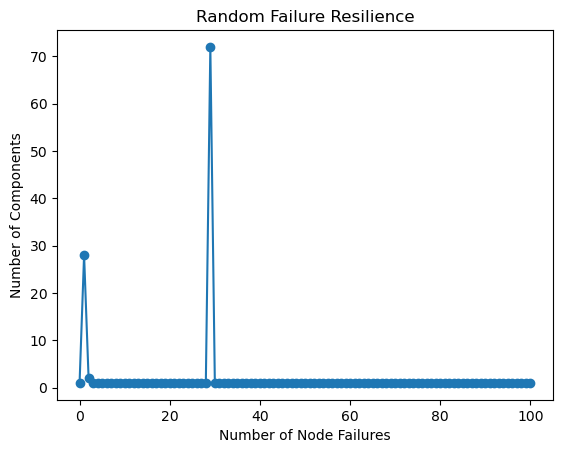

In [39]:
# Using the columns and rows from the dataset 
main_column = 'users'
target_column = 'links'

#Gathering only limited dataset
G = nx.from_pandas_edgelist(data[:100], main_column, target_column)

# Failure Analysis
def random_failure_resilience(G):
    num_nodes = G.number_of_nodes()
    num_components = []

    for node in G.nodes():
        G_new = G.copy()
        G_new.remove_node(node)
        num_components.append(nx.number_connected_components(G_new))

    return num_components

resilient_result = random_failure_resilience(G)
average_number_components = sum(resilient_result) / len(resilience_result)
print("Average number of components after node failure:", average_number_components)

# Graphs

plt.plot(range(G.number_of_nodes()), resilience_result, marker='o')
plt.xlabel('Number of Node Failures')
plt.ylabel('Number of Components')
plt.title('Random Failure Resilience')
plt.show()

### Conclusion

#### The assessment was mainly focused on finding the importance of network models and their application in real-world networks. With the use of various models such as the BA model and ER model, I was able to understand the purpose and effect of their network models. The BA model helped to understand a highly interconnected node in a free network, whereas the ER model helped the study of clustering and optimizing random networks. Different degree and connectivity between the nodes were expressed by the real network which as focusing on a negative assortative. In real networks, the clustering coefficient was also low. With failure analysis which suggested node failures and density variability, the real network was thoroughly examined. These findings were very important to understand the behavior and the importance of the network and its nodes.

## Refrences

#### Barabasi Albert Graph (for scale free models) (2022) GeeksforGeeks. Available at: https://www.geeksforgeeks.org/barabasi-albert-graph-scale-free-models/ (Accessed: 28 June 2023).

#### Build software better, together (no date) GitHub. Available at: https://github.com/topics/centrality-measures (Accessed: 28 June 2023).

#### Disney, A. (2022) Social network analysis: Understanding centrality measures, Cambridge Intelligence. Available at: https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/ (Accessed: 28 June 2023).

#### Erdos renyl model (for generating random graphs) (2022) GeeksforGeeks. Available at: https://www.geeksforgeeks.org/erdos-renyl-model-generating-random-graphs/ (Accessed: 28 June 2023).

#### Goldenberg, D. (2022) Social network analysis: From graph theory to applications with python, Medium. Available at: https://towardsdatascience.com/social-network-analysis-from-theory-to-applications-with-python-d12e9a34c2c7 (Accessed: 28 June 2023).

#### How can I contact support? (no date) OpenAI Help Center. Available at: https://help.openai.com/en/articles/6614161-how-can-i-contact-support (Accessed: 28 June 2023).

#### Maier, B.F. (2019) Generalization of the small-world effect on a model approaching the Erdős–rényi random graph, Nature News. Available at: https://www.nature.com/articles/s41598-019-45576-3 (Accessed: 28 June 2023).

#### Youtube: What is YouTube? (no date) GCFGlobal.org. Available at: https://edu.gcfglobal.org/en/youtube/what-is-youtube/1/ (Accessed: 28 June 2023).

#### Network Data Repository (no date) YouTube-Snap: Social Networks, Network Data Repository. Available at: https://networkrepository.com/soc-youtube-snap.php (Accessed: 28 June 2023).

#### NetworkX documentation (no date) NetworkX. Available at: https://networkx.org/ (Accessed: 28 June 2023).

#### (No date) 1 erd˜os-renyi model - department of computer science. Available at: https://www.cs.cornell.edu/courses/cs485/2006sp/lecture%20notes/lecture1.pdf (Accessed: 28 June 2023).

#### (No date a) The watts-strogatz (WS) model of small-world networks. the starting ... Available at: https://www.researchgate.net/figure/The-Watts-Strogatz-WS-model-of-small-world-networks-The-starting-point-is-a-regular_fig3_11314027 (Accessed: 28 June 2023).

#### (No date a) Introduction to random graphs - CMU. Available at: https://www.math.cmu.edu/~af1p/BOOK.pdf (Accessed: 28 June 2023).

#### (No date a) Random graph models of social networks | PNAS. Available at: https://www.pnas.org/doi/10.1073/pnas.012582999 (Accessed: 28 June 2023).

#### Platform, A. (2020) Centrality analysis, Medium. Available at: https://axuplatform.medium.com/centrality-analysis-832ae76a6eca (Accessed: 28 June 2023).

####  Ryan A. Rossi, N.K.A. (no date) The First Interactive Network Data Repository, Network Data Repository. Available at: https://networkrepository.com/ (Accessed: 28 June 2023).

#### Shizuka, D. (no date) Random graphs, dshizuka.github.io. Available at: https://dshizuka.github.io/networkanalysis/09_randomnets.html (Accessed: 28 June 2023).
#### Visualization with python (no date) Matplotlib. Available at: https://matplotlib.org/ (Accessed: 28 June 2023).

#### YouTube – Apps bei Google Play (no date) Google. Available at: https://play.google.com/store/apps/details?id=com.google.android.youtube&amp;hl=de&amp;pli=1 (Accessed: 28 June 2023).

## Assessment Submission Form 

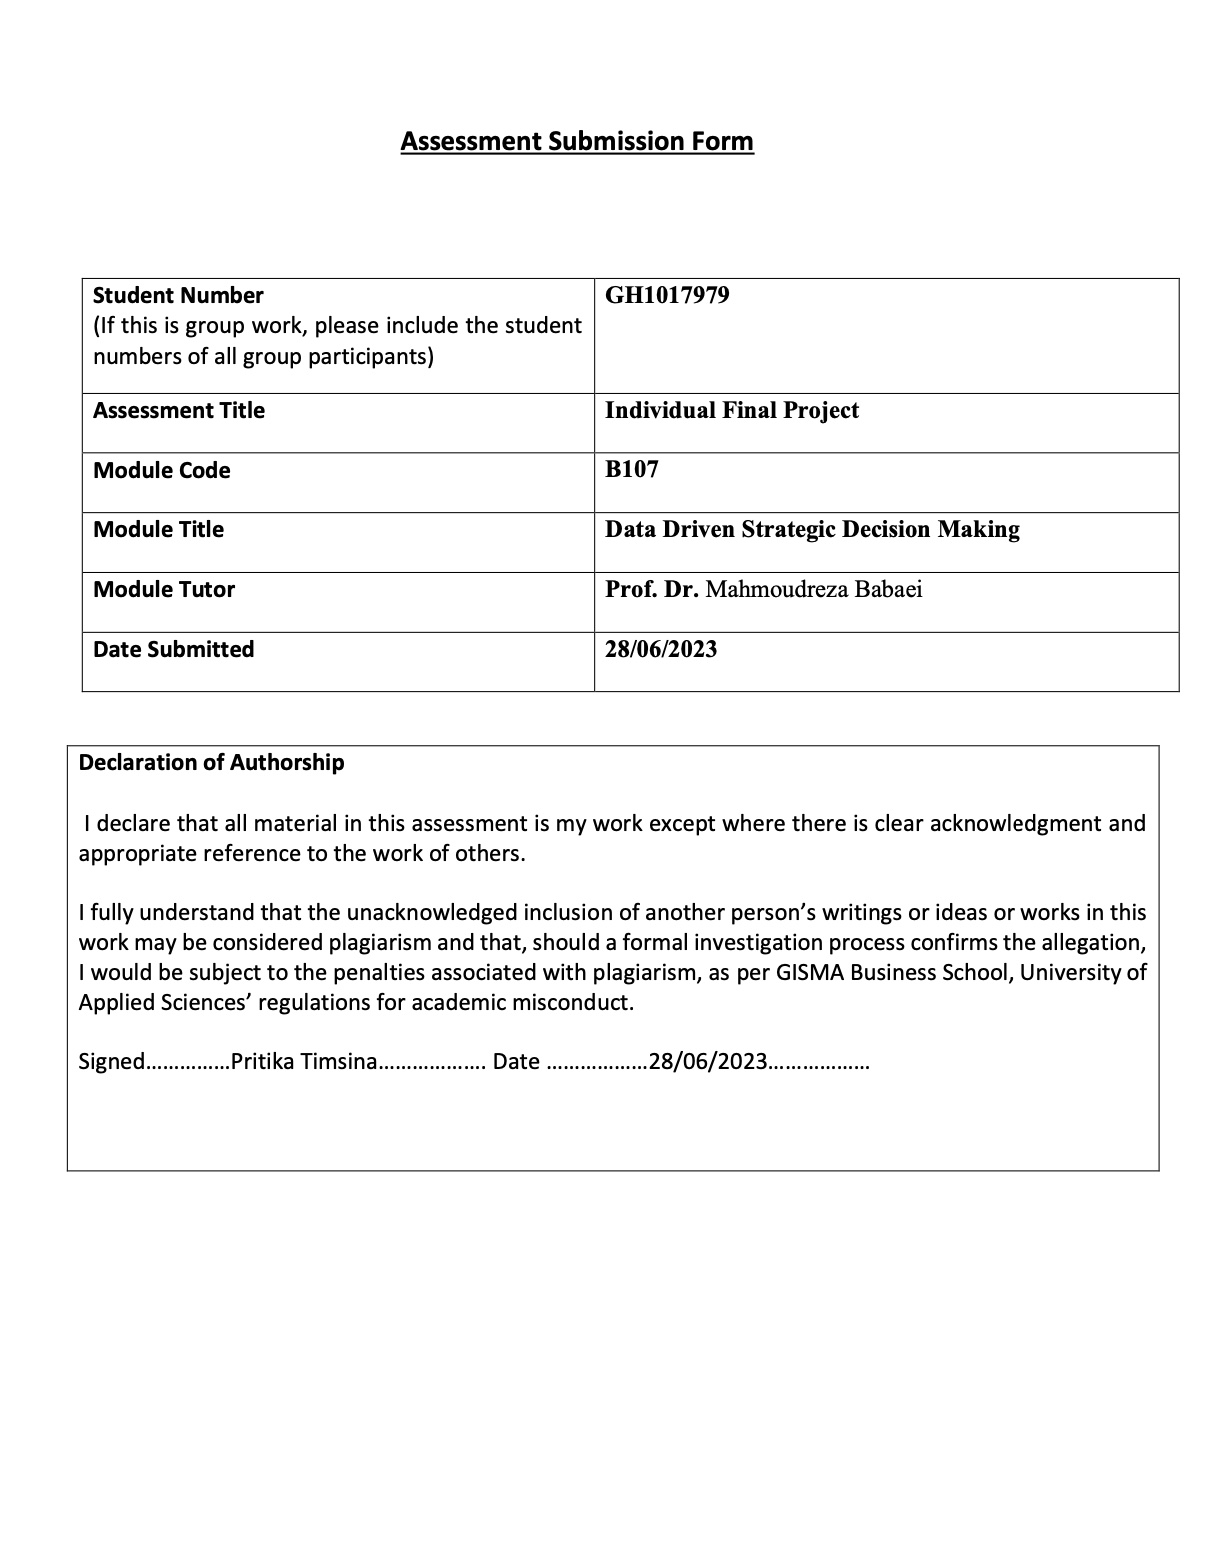

In [40]:
image_path = "AssessmentForm.jpg" 
display(Image(filename=image_path))

In [42]:
nbconvert[webpdf]`

SyntaxError: invalid syntax (1509823269.py, line 1)